In [ ]:
## Linear Regression Q&A with Python Implementation

### 1. What does R-squared represent in a regression model?
R-squared (R²) is a statistical measure that indicates how well the independent variables explain the variance in the dependent variable. It ranges from 0 to 1, where a higher value indicates a better fit.

```python
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
```

### 2. What are the assumptions of linear regression?
Linear regression assumes:
- Linearity
- Independence of errors
- Homoscedasticity
- Normal distribution of residuals
- No multicollinearity

```python
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
```

### 3. What is the difference between R-squared and Adjusted R-squared?
Adjusted R-squared accounts for the number of predictors in the model, preventing overfitting.

```python
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)
```

### 4. Why do we use Mean Squared Error (MSE)?
MSE is widely used because it penalizes larger errors more than smaller errors.

```python
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
```

### 5. What does an Adjusted R-squared value of 0.85 indicate?
An Adjusted R² of 0.85 suggests that 85% of the variation in the dependent variable is explained by the independent variables, accounting for model complexity.

### 6. How do we check for normality of residuals in linear regression?
Using a Q-Q plot:

```python
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()
```

### 7. What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when independent variables are highly correlated, leading to unstable estimates.

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF Scores:", vif)
```

### 8. What is Mean Absolute Error (MAE)?
MAE measures the average absolute difference between predicted and actual values.

```python
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
```

### 9. What are the benefits of using an ML pipeline?
Pipelines automate preprocessing, feature selection, and modeling to streamline workflows.

```python
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
```

### 10. Why is RMSE considered more interpretable than MSE?
RMSE has the same units as the dependent variable, making interpretation easier.

```python
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
```

### 11. What is pickling in Python, and how is it useful in ML?
Pickling saves ML models for later use.

```python
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
```

### 12. What does a high R-squared value mean?
A high R² suggests that the model explains most of the variability in the response variable.

### 13. What happens if linear regression assumptions are violated?
Violations can lead to biased estimates, incorrect inference, or poor predictions.

### 14. How can we address multicollinearity in regression?
- Removing correlated variables
- Using Principal Component Analysis (PCA)
- Ridge regression

### 15. How can feature selection improve model performance in regression analysis?
Feature selection removes irrelevant variables, reducing overfitting and improving interpretability.

### 16. How is Adjusted R-squared calculated?
Adjusted R² penalizes adding unnecessary predictors:

```python
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
```

### 17. Why is MSE sensitive to outliers?
MSE squares errors, so large errors have more influence.

### 18. What is the role of homoscedasticity in linear regression?
Homoscedasticity ensures constant variance of residuals.

### 19. What is Root Mean Squared Error (RMSE)?
RMSE is the square root of MSE, providing a scale-dependent measure of error.

### 20. Why is pickling considered risky?
Pickling can execute arbitrary code when loading, posing security risks.

### 21. What alternatives exist to pickling for saving ML models?
- Joblib
- JSON serialization
- HDF5

```python
from joblib import dump, load
dump(model, "model.joblib")
model = load("model.joblib")
```

### 22. What is heteroscedasticity, and why is it a problem?
Heteroscedasticity occurs when residual variance is not constant, violating regression assumptions.

### 23. How can interaction terms enhance a regression model's predictive power?
Interaction terms capture relationships between independent variables.

```python
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X_train)
```


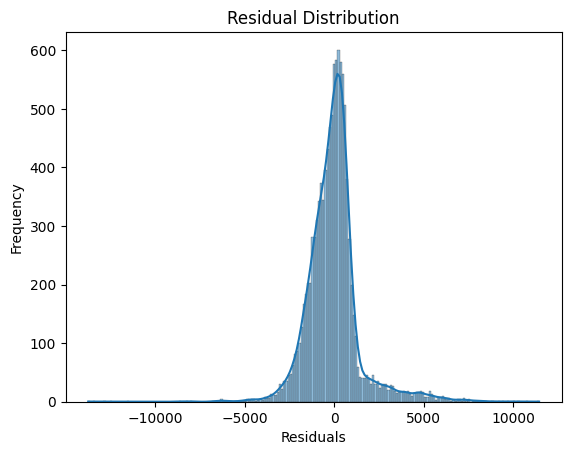

MSE: 2333883.1792799835, MAE: 994.736665092202, RMSE: 1527.7052003838908


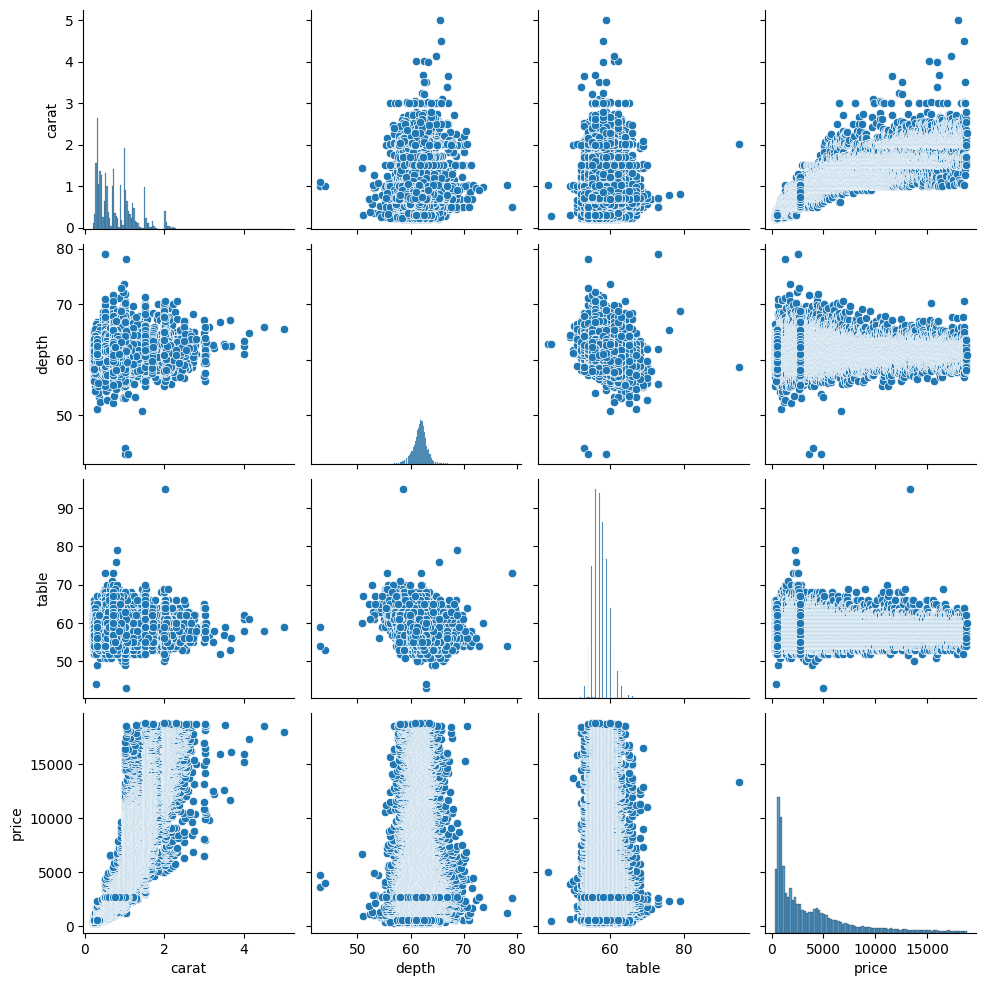

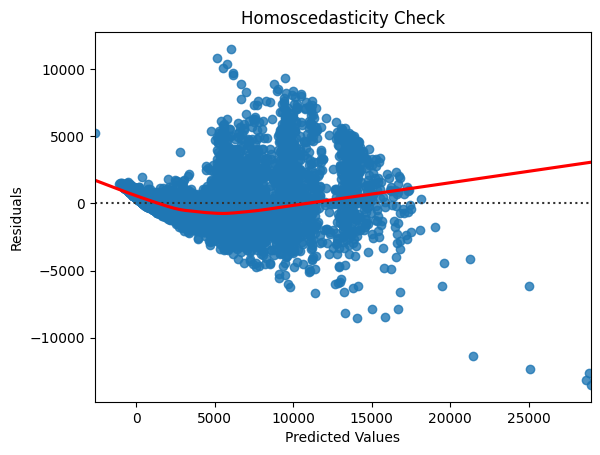

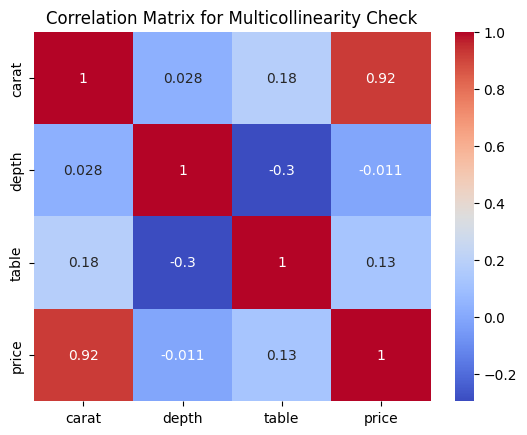

Pipeline Model R^2 Score: 0.853185544894256
Coefficient: 7768.910490360821, Intercept: -2261.9117456492177, R^2 Score: 0.8489390686155808


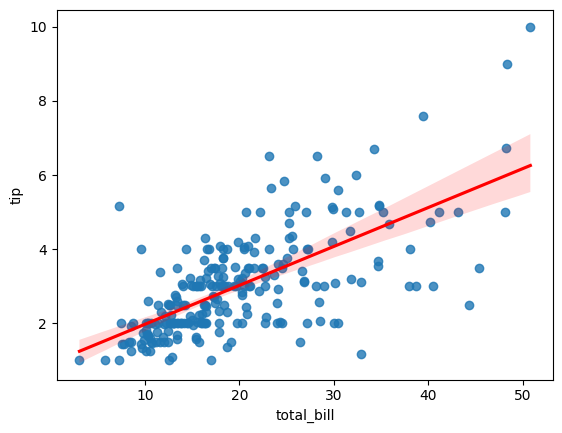

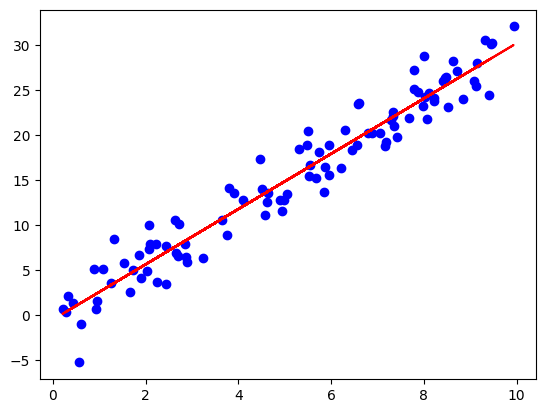

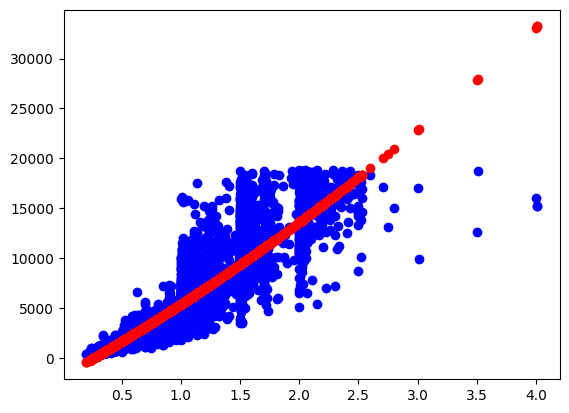

Random Data - Coefficient: 4.777058559514555, Intercept: 2.2320523303270647


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# 1. Visualizing Residuals for Multiple Linear Regression using 'diamonds' dataset
df = sns.load_dataset("diamonds").dropna()
df = df[['carat', 'depth', 'table', 'price']]
X = df[['carat', 'depth', 'table']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 2. Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

# 3. Checking Assumptions of Linear Regression
sns.pairplot(df)
plt.show()

sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Multicollinearity Check")
plt.show()

# 4. Creating ML Pipeline with Feature Scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(f"Pipeline Model R^2 Score: {r2_score(y_test, predictions)}")

# 5. Simple Linear Regression
model_simple = LinearRegression()
model_simple.fit(X_train[['carat']], y_train)
y_pred_simple = model_simple.predict(X_test[['carat']])
print(f"Coefficient: {model_simple.coef_[0]}, Intercept: {model_simple.intercept_}, R^2 Score: {r2_score(y_test, y_pred_simple)}")

# 6. Analyzing Total Bill vs Tip (Tips dataset)
tips = sns.load_dataset("tips")
X_tips = tips[['total_bill']]
y_tips = tips['tip']
model_tips = LinearRegression()
model_tips.fit(X_tips, y_tips)

sns.regplot(x='total_bill', y='tip', data=tips, line_kws={'color': 'red'})
plt.show()

# 7. Linear Regression on Synthetic Data
X_syn = np.random.rand(100, 1) * 10
y_syn = 3 * X_syn + np.random.randn(100, 1) * 2

model_syn = LinearRegression()
model_syn.fit(X_syn, y_syn)
y_pred_syn = model_syn.predict(X_syn)

plt.scatter(X_syn, y_syn, color='blue')
plt.plot(X_syn, y_pred_syn, color='red')
plt.show()

# 8. Pickling a Trained Model
with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

# 9. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['carat']])
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test[['carat']])
y_pred_poly = model_poly.predict(X_test_poly)

plt.scatter(X_test['carat'], y_test, color='blue')
plt.scatter(X_test['carat'], y_pred_poly, color='red')
plt.show()

# 10. Generating Synthetic Data for Simple Linear Regression
X_rand = np.random.rand(50, 1) * 10
y_rand = 5 * X_rand + np.random.randn(50, 1) * 3

model_rand = LinearRegression()
model_rand.fit(X_rand, y_rand)
print(f"Random Data - Coefficient: {model_rand.coef_[0][0]}, Intercept: {model_rand.intercept_[0]}")


Degree 1 - R^2 Score: 0.8016
Degree 2 - R^2 Score: 0.9902
Degree 3 - R^2 Score: 0.9960
Degree 4 - R^2 Score: 0.9960
Coefficients: [3.16933339 5.17747302]
Intercept: -0.11386386794914616
R^2 Score: 0.9239969146587892


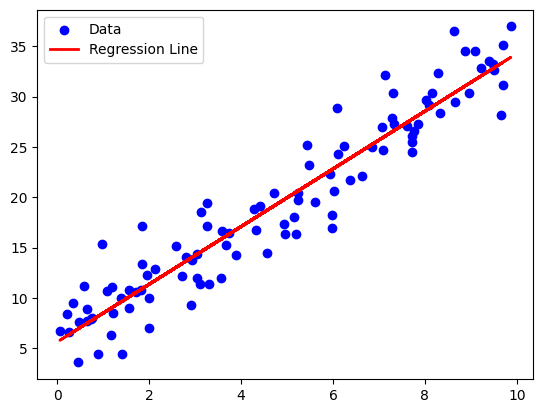

ValueError: Length of values (3) does not match length of index (100)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

# Task 11: Polynomial Regression with Different Degrees
def polynomial_regression_comparison():
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 3 * X**3 - 5 * X**2 + 2 * X + np.random.randn(100, 1) * 50

    degrees = [1, 2, 3, 4]
    for d in degrees:
        poly_features = PolynomialFeatures(degree=d)
        X_poly = poly_features.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        print(f"Degree {d} - R^2 Score: {r2_score(y, y_pred):.4f}")

# Task 12: Simple Linear Regression with Two Features
def simple_linear_regression():
    np.random.seed(42)
    X = np.random.rand(100, 2)
    y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.5

    model = LinearRegression()
    model.fit(X, y)
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("R^2 Score:", model.score(X, y))

# Task 13: Linear Regression with Visualization
def visualize_linear_regression():
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 3 * X + 5 + np.random.randn(100, 1) * 3

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.legend()
    plt.show()

# Task 14: Check for Multicollinearity using VIF
def check_multicollinearity():
    np.random.seed(42)
    X = np.random.rand(100, 3)
    df = pd.DataFrame(X, columns=["Feature1", "Feature2", "Feature3"])
    df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    print(df)

# Task 15: Polynomial Regression (Degree 4) Visualization
def polynomial_regression_degree_4():
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 4 * X**4 - 3 * X**3 + 2 * X**2 - 5 * X + np.random.randn(100, 1) * 50

    poly_features = PolynomialFeatures(degree=4)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.scatter(X, y, color='blue', label='Data')
    plt.scatter(X, y_pred, color='red', label='Polynomial Fit')
    plt.legend()
    plt.show()

# Task 21: Save and Load Model using Joblib
def save_and_load_model():
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 3 * X + 5 + np.random.randn(100, 1) * 3

    model = LinearRegression()
    model.fit(X, y)
    joblib.dump(model, "linear_model.pkl")

    loaded_model = joblib.load("linear_model.pkl")
    print("Loaded Model Coefficients:", loaded_model.coef_)
    print("Loaded Model Intercept:", loaded_model.intercept_)

# Task 22: Linear Regression with One-Hot Encoding (Tips Dataset)
def linear_regression_one_hot_encoding():
    df = sns.load_dataset("tips")
    df = pd.get_dummies(df, columns=["sex", "smoker", "day", "time"], drop_first=True)
    X = df.drop("tip", axis=1)
    y = df["tip"]

    model = LinearRegression()
    model.fit(X, y)
    print("R^2 Score:", model.score(X, y))

# Task 23: Compare Ridge Regression with Linear Regression
def compare_ridge_linear_regression():
    np.random.seed(42)
    X = np.random.rand(100, 3)
    y = 3 * X[:, 0] - 2 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

    model_lr = LinearRegression()
    model_ridge = Ridge(alpha=1.0)
    model_lr.fit(X, y)
    model_ridge.fit(X, y)

    print("Linear Regression Coefficients:", model_lr.coef_)
    print("Ridge Regression Coefficients:", model_ridge.coef_)
    print("Linear Regression R^2 Score:", model_lr.score(X, y))
    print("Ridge Regression R^2 Score:", model_ridge.score(X, y))

# Task 25: Compare Polynomial Regression Degrees
def compare_polynomial_degrees():
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10
    y = 2 * X**3 - 4 * X**2 + X + np.random.randn(100, 1) * 50

    for d in range(1, 5):
        poly_features = PolynomialFeatures(degree=d)
        X_poly = poly_features.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        print(f"Degree {d} - R^2 Score: {r2_score(y, y_pred):.4f}")

# Run one of the functions to see results
if __name__ == "__main__":
    polynomial_regression_comparison()
    simple_linear_regression()
    visualize_linear_regression()
    check_multicollinearity()
    polynomial_regression_degree_4()
    save_and_load_model()
    linear_regression_one_hot_encoding()
    compare_ridge_linear_regression()
    compare_polynomial_degrees()
